In [1]:
!pip install faiss-gpu
!pip install faiss-cpu
import pandas as pd

file_path = '/kaggle/input/dataset/Problem Statements and Data Sets 2/usecase_1_.csv'
df = pd.read_csv(file_path)
df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 20.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 67.7 MB/s eta 0:00:00:00:0100:01


,Unnamed: 0.1,Unnamed: 0,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,...,Study Design,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents
0,0,1,NCT03302091,A Study in People With Normal Kidney Function ...,https://clinicaltrials.gov/study/NCT03302091,NaN,COMPLETED,The primary objective of the current study is ...,YES,Renal Insufficiency|Healthy,...,Allocation: NON_RANDOMIZED|Intervention Model:...,1386-0002|2017-002180-18,2017-10-17,2018-08-16,2018-08-16,2017-10-04,2021-06-04,2021-06-04,"CRS Clinical Research Services Kiel GmbH, Kiel...","Study Protocol, https://cdn.clinicaltrials.gov..."
1,1,2,NCT01948791,16w Interventional Study on Titration and Dose...,https://clinicaltrials.gov/study/NCT01948791,INSTINCT,COMPLETED,To investigate the efficacy of Exelon capsule ...,YES,Alzheimer's Disease,...,Allocation: NA|Intervention Model: SINGLE_GROU...,CENA713BCN05,2014-08,2015-09,2015-09,2013-09-24,2017-02-13,2017-02-13,"Novartis Investigative Site, Beijing, 100053, ...",NaN
2,2,5,NCT04621591,Case Series With Saneso 360° Gastroscope,https://clinicaltrials.gov/study/NCT04621591,NaN,COMPLETED,To confirm the procedural performance of the S...,NO,EGD Procedure,...,Allocation: NA|Intervention Model: SINGLE_GROU...,SAN360UGICL,2020-08-01,2020-08-30,2020-09-09,2020-11-09,NaN,2020-11-10,"Valley Endoscopy Center, Saint Clairsville, Oh...",NaN
3,3,6,NCT03130491,European Study Evaluating the EMBLOK Embolic P...,https://clinicaltrials.gov/study/NCT03130491,NaN,COMPLETED,The primary objective is to evaluate the perfo...,NO,Aortic Valve Disease,...,Allocation: NA|Intervention Model: SINGLE_GROU...,CLP002-2016,2017-03-08,2021-11-01,2022-01-28,2017-04-26,NaN,2024-03-05,"Hospital San Donato, Milan, Milano, 20097, Ita...",NaN
4,4,8,NCT01580891,Evaluate the Clinical Equivalence of Two Nafti...,https://clinicaltrials.gov/study/NCT01580891,NaN,COMPLETED,The objective of this study is to evaluate the...,NO,Tinea Pedis,...,Allocation: RANDOMIZED|Intervention Model: PAR...,NTFC 1105.0,2012-05,2013-03,2013-07,2012-04-19,NaN,2014-05-06,NaN,NaN


In [2]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'NCT Number', 'Study Title', 'Study URL',
       'Acronym', 'Study Status', 'Brief Summary', 'Study Results',
       'Conditions', 'Interventions', 'Primary Outcome Measures',
       'Secondary Outcome Measures', 'Other Outcome Measures', 'Sponsor',
       'Collaborators', 'Sex', 'Age', 'Phases', 'Enrollment', 'Funder Type',
       'Study Type', 'Study Design', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents'],
      dtype='object')


In [3]:
criteria_file_path = '/kaggle/input/dataset/Problem Statements and Data Sets 2/eligibilities.txt'
with open(criteria_file_path, 'r') as f:
    criteria_data = f.read().splitlines()

criteria_data[:5]
# df_new['Criteria'] = criteria_data

['id|nct_id|sampling_method|gender|minimum_age|maximum_age|healthy_volunteers|population|criteria|gender_description|gender_based|adult|child|older_adult',
 '6260055|NCT05050916||FEMALE|19 Years|40 Years|f||"* INCLUSION CRITERIA:~In order to be eligible to participate in this study, an individual must meet all of the following criteria:~* Provision of signed and dated informed consent form~* Stated willingness to comply with all study procedures and availability for the duration of the study~* Having natural, spontaneous menstrual cycles (no hormonal therapy) less than 50 days in length.~* Aged 19-40 years~* Ability to take a vitamin D capsule and willing to adhere to the weekly regimen~* If sexually active, use of a non-hormonal contraceptive method.~EXCLUSION CRITERIA:~An individual who meets any of the following criteria will be excluded from participation in this study:~* No menstrual period in the last 50 days, or, a typical menstrual cycle length \\<16 or \\>49 days.~* Use of a v

In [4]:
parsed_data = [line.split("|") for line in criteria_data[1:]]
eligibility_dict = {line[1]: line[8] for line in parsed_data}

In [5]:
df["eligibility"] = df["NCT Number"].map(eligibility_dict)
df

,Unnamed: 0.1,Unnamed: 0,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,eligibility
0,0,1,NCT03302091,A Study in People With Normal Kidney Function ...,https://clinicaltrials.gov/study/NCT03302091,NaN,COMPLETED,The primary objective of the current study is ...,YES,Renal Insufficiency|Healthy,...,1386-0002|2017-002180-18,2017-10-17,2018-08-16,2018-08-16,2017-10-04,2021-06-04,2021-06-04,"CRS Clinical Research Services Kiel GmbH, Kiel...","Study Protocol, https://cdn.clinicaltrials.gov...","""Inclusion Criteria:~* Despite of moderate ren..."
1,1,2,NCT01948791,16w Interventional Study on Titration and Dose...,https://clinicaltrials.gov/study/NCT01948791,INSTINCT,COMPLETED,To investigate the efficacy of Exelon capsule ...,YES,Alzheimer's Disease,...,CENA713BCN05,2014-08,2015-09,2015-09,2013-09-24,2017-02-13,2017-02-13,"Novartis Investigative Site, Beijing, 100053, ...",NaN,"""Key Inclusion Criteria:~* Have a diagnosis of..."
2,2,5,NCT04621591,Case Series With Saneso 360° Gastroscope,https://clinicaltrials.gov/study/NCT04621591,NaN,COMPLETED,To confirm the procedural performance of the S...,NO,EGD Procedure,...,SAN360UGICL,2020-08-01,2020-08-30,2020-09-09,2020-11-09,NaN,2020-11-10,"Valley Endoscopy Center, Saint Clairsville, Oh...",NaN,"""Inclusion Criteria:~* 18 -74 years of age~* W..."
3,3,6,NCT03130491,European Study Evaluating the EMBLOK Embolic P...,https://clinicaltrials.gov/study/NCT03130491,NaN,COMPLETED,The primary objective is to evaluate the perfo...,NO,Aortic Valve Disease,...,CLP002-2016,2017-03-08,2021-11-01,2022-01-28,2017-04-26,NaN,2024-03-05,"Hospital San Donato, Milan, Milano, 20097, Ita...",NaN,"""Inclusion Criteria: Subject is between 18 and..."
4,4,8,NCT01580891,Evaluate the Clinical Equivalence of Two Nafti...,https://clinicaltrials.gov/study/NCT01580891,NaN,COMPLETED,The objective of this study is to evaluate the...,NO,Tinea Pedis,...,NTFC 1105.0,2012-05,2013-03,2013-07,2012-04-19,NaN,2014-05-06,NaN,NaN,"""Inclusion Criteria:~* Male or non-pregnant, n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117975,117975,150114,NCT00706654,Intramuscular Depot Formulation of Aripiprazol...,https://clinicaltrials.gov/study/NCT00706654,ASPIRE,COMPLETED,The purpose of the this trial is to evaluate t...,YES,Schizophrenia,...,31-07-247,2008-09,2012-08,2012-08,2008-06-27,2013-08-14,2013-08-14,"Cerritos, California, 90703, United States|Esc...",NaN,"""Inclusion Criteria:~* Subjects who are able t..."
117976,117976,150117,NCT05098054,A Study of Soticlestat in Adults With Liver Fa...,https://clinicaltrials.gov/study/NCT05098054,NaN,COMPLETED,The main aim is to check the effect of a singl...,YES,Hepatic Impairment|Healthy Volunteers,...,TAK-935-1010|2021-006373-29,2021-10-29,2022-05-31,2022-06-07,2021-10-28,2024-02-02,2024-02-02,"Velocity, Edgewater, Florida, 32132, United St...","Study Protocol, https://cdn.clinicaltrials.gov...","""Inclusion Criteria A. For Participants with H..."
117977,117977,150119,NCT06352554,Susceptibility Testing In Neisseria Gonorrhoea...,https://clinicaltrials.gov/study/NCT06352554,STING,NOT_YET_RECRUITING,This study aims to validate a novel antibiotic...,NO,Diagnosis|Gonorrhea|Resistance Bacterial,...,2023/ETH02474:STING|224842/Z/21/Z|75A50122C00028,2024-04-08,2024-12-30,2025-01-30,2024-04-08,NaN,2024-04-09,NaN,NaN,"""Inclusion Criteria:~* Confirmed/suspected NG ..."
117978,117978,150120,NCT00710554,A Study of Sativex® for Pain Relief of Periphe...,https://clinicaltrials.gov/study/NCT00710554,NaN,COMPLETED,The purpose of this study is to evaluate the e...,YES,Pain|Peripheral Neuropathy,...,GWCL0405,2005-08,2006-10,2006-10,2008-07-04,2012-09-14,2023-05-03,"Pain Clinic Office, Gartnavel General Hospital...",NaN,"""Inclusion Criteria:~* Willing and able to giv..."


In [6]:
columns_to_remove = ['Unnamed: 0.1', 'Unnamed: 0', 'Study URL','Acronym', 'Study Status', 'Brief Summary', 
                     'Study Results', 'Conditions', 'Interventions','Other Outcome Measures', 'Sponsor', 'Collaborators', 
                     'Sex', 'Age', 'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design', 'Other IDs', 
                     'Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Results First Posted', 
                     'Last Update Posted', 'Locations', 'Study Documents']
df = df.drop(columns=columns_to_remove)

In [7]:
df.columns

Index(['NCT Number', 'Study Title', 'Primary Outcome Measures',
       'Secondary Outcome Measures', 'eligibility'],
      dtype='object')

In [8]:
df = df.dropna(subset=['Study Title', 'Primary Outcome Measures', 'eligibility'])

In [9]:
df

,NCT Number,Study Title,Primary Outcome Measures,Secondary Outcome Measures,eligibility
0,NCT03302091,A Study in People With Normal Kidney Function ...,Area Under the Concentration-time Curve of BI ...,Area Under the Concentration-time Curve of BI ...,"""Inclusion Criteria:~* Despite of moderate ren..."
1,NCT01948791,16w Interventional Study on Titration and Dose...,Mean Change From Baseline in the Alzheimer's D...,Change From Baseline in the Alzheimer's Diseas...,"""Key Inclusion Criteria:~* Have a diagnosis of..."
2,NCT04621591,Case Series With Saneso 360° Gastroscope,"Successful EGD, Procedure success is assessed ...",Endoscopist qualitative rating of the Saneso 3...,"""Inclusion Criteria:~* 18 -74 years of age~* W..."
3,NCT03130491,European Study Evaluating the EMBLOK Embolic P...,"Performance Endpoint, successful insertion, pl...","Safety Endpoint (Rate of MACCE), Rate of MACCE...","""Inclusion Criteria: Subject is between 18 and..."
4,NCT01580891,Evaluate the Clinical Equivalence of Two Nafti...,"Therapeutic Cure, Patients with both mycologic...",NaN,"""Inclusion Criteria:~* Male or non-pregnant, n..."
...,...,...,...,...,...
117975,NCT00706654,Intramuscular Depot Formulation of Aripiprazol...,Percentage of Patients Meeting Exacerbation of...,Time to Exacerbation of Psychotic Symptoms/Imp...,"""Inclusion Criteria:~* Subjects who are able t..."
117976,NCT05098054,A Study of Soticlestat in Adults With Liver Fa...,Cmax: Maximum Observed Plasma Concentration fo...,Number of Participants Reporting One or More T...,"""Inclusion Criteria A. For Participants with H..."
117977,NCT06352554,Susceptibility Testing In Neisseria Gonorrhoea...,To determine the feasibility of performing ant...,To study the performance of the InSignia assay...,"""Inclusion Criteria:~* Confirmed/suspected NG ..."
117978,NCT00710554,A Study of Sativex® for Pain Relief of Periphe...,Change From Baseline in Mean Peripheral Neurop...,Change From Baseline in Neuropathic Pain Scale...,"""Inclusion Criteria:~* Willing and able to giv..."


In [10]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm 

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
model = AutoModel.from_pretrained("dmis-lab/biobert-v1.1").to(device)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

In [12]:
import pandas as pd
from tqdm import tqdm
import torch

def compute_embeddings_batch(texts):
    # Tokenize the batch
    encoded_input = tokenizer(
        texts, padding=True, truncation=True, max_length=128, return_tensors="pt"
    ).to(device)
    
    # Compute embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)
    
    # Return mean of the last hidden state as sentence embeddings
    embeddings = model_output.last_hidden_state.mean(dim=1).cpu().numpy()
    return embeddings

# Define columns for which embeddings need to be created
embedding_columns = ["Study Title", "Primary Outcome Measures", "Secondary Outcome Measures", "eligibility"] 
retain_columns = ["NCT Number"]  # Replace with the column you want to retain as it is
batch_size = 32  # Adjust batch size based on memory

# Initialize new DataFrame
embedding_df = pd.DataFrame()

# Compute embeddings for selected columns
for column in embedding_columns:
    if column not in df.columns:
        print(f"Column {column} does not exist in the DataFrame.")
        continue

    print(f"Processing column: {column}")
    texts = df[column].fillna("").tolist()  # Handle NaN values
    column_embeddings = []
    
    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i + batch_size]
        batch_embeddings = compute_embeddings_batch(batch_texts)
        column_embeddings.extend(batch_embeddings)
    
    # Add embeddings as a new column to the DataFrame
    embedding_df[f"{column}_embeddings"] = column_embeddings

# Retain the specified column as it is
for column in retain_columns:
    if column not in df.columns:
        print(f"Column {column} does not exist in the DataFrame.")
        continue
    embedding_df[column] = df[column]

# Save the final DataFrame to disk
embedding_df.to_parquet("final_dataframe_with_embeddings.parquet")
print("New DataFrame with embeddings and the retained column saved!")

Processing column: Study Title


100%|██████████| 3535/3535 [07:04<00:00,  8.33it/s]


Processing column: Primary Outcome Measures


100%|██████████| 3535/3535 [12:03<00:00,  4.89it/s]


Processing column: Secondary Outcome Measures


100%|██████████| 3535/3535 [12:26<00:00,  4.73it/s]


Processing column: eligibility


100%|██████████| 3535/3535 [12:35<00:00,  4.68it/s]


New DataFrame with embeddings and the retained column saved!


In [13]:
embedding_df

,Study Title_embeddings,Primary Outcome Measures_embeddings,Secondary Outcome Measures_embeddings,eligibility_embeddings,NCT Number
0,"[-0.065264046, -0.092744045, -0.22700635, 0.17...","[0.05297418, -0.24113894, 0.0008954331, 0.1503...","[0.05606445, -0.2799284, 0.071237825, 0.180695...","[-0.09281416, -0.17330389, 0.08660969, 0.00623...",NCT03302091
1,"[-0.0053087957, -0.061169587, -0.08494293, 0.1...","[0.11766142, 0.013265373, -0.11087042, 0.26961...","[0.020012934, -0.08214941, -0.19556046, 0.1607...","[-0.082426585, -0.18671341, 0.007904554, 0.090...",NCT01948791
2,"[-0.22539619, -0.08245689, -0.3285748, 0.21585...","[-0.059805617, -0.101662174, -0.018482223, 0.1...","[0.057834648, -0.14884987, -0.06832139, 0.2609...","[7.056305e-05, -0.02793643, -0.010959615, 0.15...",NCT04621591
3,"[-0.13534802, -0.20745067, -0.10994539, 0.2188...","[0.028187705, -0.103455745, -0.086739525, 0.11...","[-0.025586503, 0.1292601, -0.074246675, 0.0213...","[0.008869184, -0.14230067, 0.09451622, 0.10525...",NCT03130491
4,"[-0.11337181, -0.41438612, 0.036117, 0.3372785...","[0.019699685, -0.06446257, 0.11373979, 0.19213...","[0.24691302, -0.17939429, -0.12142427, 0.08054...","[-0.035337817, -0.2909071, 0.02144168, 0.08162...",NCT01580891
...,...,...,...,...,...
113096,"[-0.1807382, -0.08000226, 0.065313324, 0.20722...","[0.011189978, 0.113739885, 0.10325801, -0.0152...","[-0.001914599, -0.031723417, 0.037113667, -0.0...","[0.015561412, -0.13939855, 0.2855791, -0.02046...",NCT02165345
113097,"[-0.07270654, -0.122345306, 0.024599317, 0.243...","[0.103260934, -0.211911, 0.1612402, 0.05691315...","[0.25566822, -0.16646692, -0.15347317, -0.0345...","[0.097778246, -0.0010176096, -0.052690737, 0.1...",NCT00407745
113098,"[0.047925193, 0.044782896, -0.2267468, 0.17400...","[0.2012643, 0.054376222, -0.047303993, 0.07088...","[0.23182309, 0.020095825, -0.0009980015, 0.078...","[-0.0035707634, -0.08287071, 0.033421993, -0.0...",NCT01649245
113099,"[-0.064414054, -0.20857231, 0.057979308, 0.268...","[0.16945687, -0.33824772, 0.040958915, 0.14733...","[0.08082056, -0.22409007, -0.04124582, 0.14769...","[-0.006804131, -0.16514528, 0.044964887, 0.087...",NCT00401245


In [14]:
embedding_df.columns

Index(['Study Title_embeddings', 'Primary Outcome Measures_embeddings',
       'Secondary Outcome Measures_embeddings', 'eligibility_embeddings',
       'NCT Number'],
      dtype='object')

In [15]:
import faiss
import numpy as np

# Step 1: Combine embeddings into a single representation
embedding_columns = [col for col in embedding_df.columns if col.endswith("_embeddings")]
print("Embedding columns:", embedding_columns)

# Combine embeddings into a single NumPy array
embeddings = np.hstack([np.vstack(embedding_df[col].to_numpy()) for col in embedding_columns])
print(f"Combined embeddings shape: {embeddings.shape}")

# Step 2: Build and save the FAISS index
dimension = embeddings.shape[1]  # Number of features per embedding
index = faiss.IndexFlatL2(dimension)  # Use L2 distance (Euclidean)
index.add(embeddings)  # Add combined embeddings to the index
faiss.write_index(index, "faiss_index.index")  # Save index to disk
print("FAISS index saved to 'faiss_index.index'.")

# Step 3: Function to process a query and compute its embedding
def compute_query_embedding(query):
    """
    Computes the combined embedding for a query.
    The query is expected to be a dictionary with specific keys corresponding
    to the columns: 'Study Title', 'Primary Outcome Measures', etc.
    """
    def compute_single_embedding(text):
        """
        Computes the embedding for a single text input using the tokenizer and model.
        """
        # Tokenize the text
        encoded_input = tokenizer(
            text, padding=True, truncation=True, max_length=128, return_tensors="pt"
        ).to(device)
        
        # Compute the embedding
        with torch.no_grad():
            model_output = model(**encoded_input)
        
        # Return the mean of the last hidden state
        return model_output.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    
    # Compute embeddings for each query component
    query_embeddings = [
        compute_single_embedding(query['Study Title']),
        compute_single_embedding(query['Primary Outcome Measures']),
        compute_single_embedding(query['Secondary Outcome Measures']),
        compute_single_embedding(query['eligibility']),
    ]
    
    # Combine all query embeddings into a single representation
    return np.hstack(query_embeddings)

# Example Usage
example_query = {
    "Study Title": "Exploring the effects of a new treatment on chronic pain",
    "Primary Outcome Measures": "Reduction in pain scores after 12 weeks",
    "Secondary Outcome Measures": "Improved mobility and quality of life",
    "eligibility": "Participants aged 18-65 with chronic pain for at least 1 year",
}

query_embedding = compute_query_embedding(example_query).reshape(1, -1)
print(f"Query embedding shape: {query_embedding.shape}")

Embedding columns: ['Study Title_embeddings', 'Primary Outcome Measures_embeddings', 'Secondary Outcome Measures_embeddings', 'eligibility_embeddings']
Combined embeddings shape: (113101, 3072)
FAISS index saved to 'faiss_index.index'.
Query embedding shape: (3072,)


In [ ]:
import faiss
import numpy as np

# Step 1: Combine embeddings into a single representation
embedding_columns = [col for col in embedding_df.columns if col.endswith("_embeddings")]
    print(embedding_columns)

embeddings = np.hstack([np.vstack(embedding_df[col].to_numpy()) for col in embedding_columns])

# Step 2: Build a FAISS index
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)  # Use L2 distance
index.add(embeddings)  # Add combined embeddings to the index
faiss.write_index(index, "faiss_index.index")

['Primary Outcome Measures_embeddings', 'Secondary Outcome Measures_embeddings', 'eligibility_embeddings', 'NCT Number']


In [ ]:
# Step 3: Process the query and compute its embedding
def compute_query_embedding(query):
    def compute_single_embedding(text):
        encoded_input = tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors="pt").to(device)
        with torch.no_grad():
            model_output = model(**encoded_input)
        return model_output.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    
    query_embeddings = [
        compute_single_embedding(query['Study Title']),
        compute_single_embedding(query['Primary Outcome Measures']),
        compute_single_embedding(query['Secondary Outcome Measures']),
        compute_single_embedding(query['eligibility']),
    ]
    return np.hstack(query_embeddings)

In [ ]:
query = {
    'Study Title': 'Heart disease study',
    'Primary Outcome Measures': 'Improved blood pressure levels',
    'Secondary Outcome Measures': 'Quality of life',
    'eligibility': 'Adults over 40 years old',
}
query_embedding = compute_query_embedding(query).reshape(1, -1)

In [18]:
index = faiss.read_index("faiss_index.index")
print("FAISS index loaded successfully.")

# Perform similarity search
k = 10  # Number of nearest neighbors to retrieve
D, I = index.search(np.expand_dims(query_embedding, axis=0), k)  # Search for k nearest neighbors

# `D` contains distances, `I` contains indices of nearest neighbors
print(f"Indices of nearest neighbors: {I}")
print(f"Distances to nearest neighbors: {D}")

# Retrieve the rows of the nearest neighbors
nearest_neighbors = embedding_df.iloc[I[0]]
print("Nearest neighbors:")
print(nearest_neighbors)

FAISS index loaded successfully.
Indices of nearest neighbors: [[ 77126  36088  79543  40493  71890 103959  98838  30479  52978   8193]]
Distances to nearest neighbors: [[117.766174 119.54239  120.95699  121.64592  121.86274  122.64093
  122.94597  123.032425 123.26256  123.36394 ]]
Nearest neighbors:
                                   Study Title_embeddings  \
77126   [-0.06251358, -0.023497934, -0.0999272, 0.1996...   
36088   [-0.08007579, -0.214347, -0.12728912, 0.305154...   
79543   [-0.10543092, -0.2727884, -0.11979157, 0.21689...   
40493   [-0.036564834, -0.30104122, -0.043989807, 0.29...   
71890   [-0.11784419, -0.4843988, -0.0010962815, 0.218...   
103959  [-0.042666517, -0.06711923, -0.10795694, 0.247...   
98838   [-0.117049195, -0.29982832, -0.17692001, 0.287...   
30479   [-0.074319355, -0.19194257, -0.039157145, 0.15...   
52978   [-0.16095619, 0.0025830972, -0.09833116, 0.205...   
8193    [-0.041112266, -0.111243136, -0.121859685, 0.2...   

                      Pri

In [24]:
# Step 5: Display results
print(f"Query: {query_embedding}")
print("\nTop 10 Most Similar Entries:")
for rank, idx in enumerate(I[0]):
    if idx < len(df):  # Avoid out-of-bounds errors
        print(f"{rank + 1}.")
        print(f"  NCT Number: {df.iloc[idx]['NCT Number']}")
        print(f"  Study Title: {df.iloc[idx]['Study Title']}")
        print(f"  Primary Outcome Measures: {df.iloc[idx]['Primary Outcome Measures']}")
        print(f"  Secondary Outcome Measures: {df.iloc[idx]['Secondary Outcome Measures']}")
        print(f"  eligibility: {df.iloc[idx]['eligibility']}")
        print(f"  Distance: {D[0][rank]:.4f}\n")

Query: [-0.04002237 -0.00319097 -0.01345607 ...  0.10875286  0.25571352
 -0.23345633]

Top 10 Most Similar Entries:
1.
  NCT Number: NCT00246142
  Study Title: A Study of the Combination of Electrical Stimulation and Dysport® in Myofascial Pain Syndrome.
  Primary Outcome Measures: Changes in mean pain measured by Visual Analogue Scale (VAS) will be assessed., Comparison of VAS will be performed before Dysport® injection and at 16 weeks after injection|Number of patients in percentage whose pain intensity measured by VAS decreases to less than 50% of baseline., Before Dysport® injection and at 16 weeks after injection
  Secondary Outcome Measures: Pain threshold measured by pressure algometer., At each visit|Neck Pain and Disability scale (NPAD) and Global Assessment of Impairment Scale (GAS) will be assessed., At each visit
  eligibility: "Inclusion Criteria:~* Chronic neck and shoulder pain for at least 6 months, refractory with other conservative treatments~* Presents at baseline wi

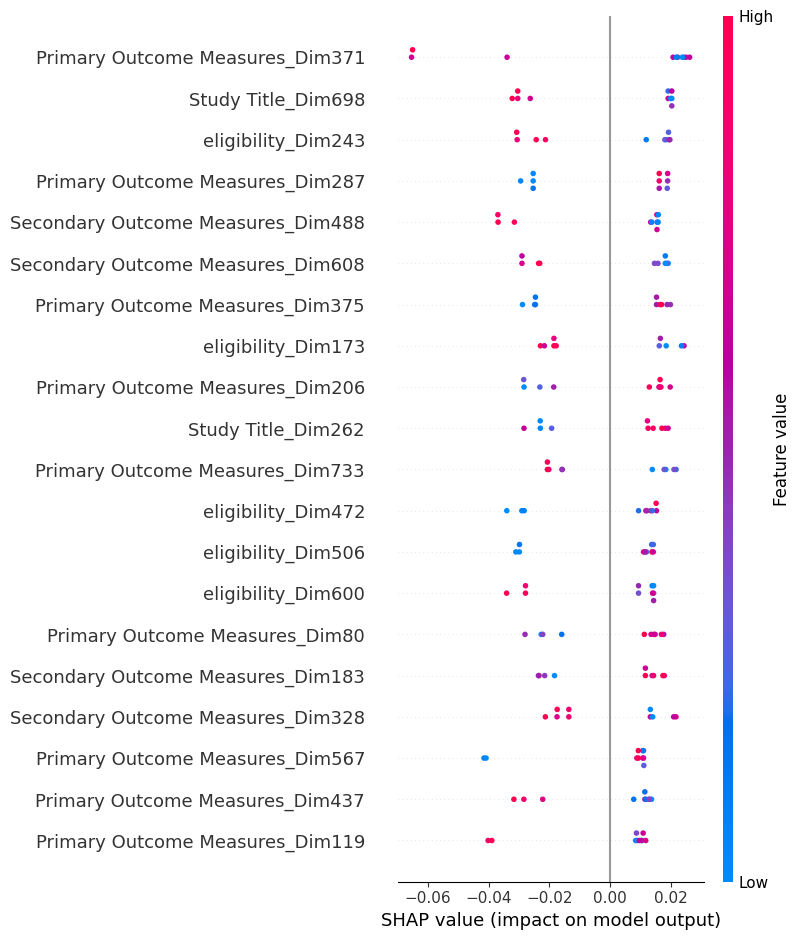

In [30]:
import shap
from sklearn.ensemble import RandomForestRegressor

# Ensure `all_embeddings` and `D` are defined correctly
all_embeddings = embeddings  # Use the combined embeddings created earlier
D = D.flatten()  # Flatten the FAISS distances array

# Ensure X_train and y_train sizes match
X_train = all_embeddings[:len(D)]  # Feature matrix
y_train = D  # Target variable (distances)

# Define the original sources of the embeddings
embedding_sources = ["Study Title", "Primary Outcome Measures", "Secondary Outcome Measures", "eligibility"]

# Assume each source contributes an equal number of dimensions
dimensions_per_source = X_train.shape[1] // len(embedding_sources)

# Generate meaningful feature names
feature_names = [
    f"{source}_Dim{dim + 1}"
    for source in embedding_sources
    for dim in range(dimensions_per_source)
]

# Debug: Ensure the number of feature names matches the number of dimensions
assert len(feature_names) == X_train.shape[1], "Mismatch in feature names and embedding dimensions!"

# Train the RandomForest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Use SHAP to explain the model
explainer = shap.Explainer(model, X_train)  # SHAP explainer
shap_values = explainer(X_train[:10])  # SHAP values for the first 10 instances

# Visualize SHAP values with meaningful feature names
shap.summary_plot(shap_values, X_train, feature_names=feature_names)

In [32]:
import shap
import numpy as np

# Assuming `shap_values` and `X_train` are already defined

# Convert SHAP values and feature values to float64 for compatibility with JSON serialization
instance_index = 0  # Index of the instance to visualize
shap_values_instance = shap_values[instance_index].values.astype(np.float64)  # Convert SHAP values to float64
X_train_instance = X_train[instance_index].astype(np.float64)  # Convert feature values to float64

# Initialize SHAP visualization in the notebook
shap.initjs()

# Visualize SHAP values for the first instance
shap.force_plot(
    explainer.expected_value,  # Expected value (the average model prediction)
    shap_values_instance,  # The SHAP values for a given instance
    X_train_instance,  # The actual feature values for that instance
    feature_names=feature_names  # Provide feature names to make it interpretable
)

In [40]:
from IPython.display import FileLink
FileLink(r'faiss_index.index')

/kaggle/working/faiss_index.index